In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from tqdm import tqdm
import numpy as np
from PIL import Image
from csbdeep.utils import normalize
import tifffile as tiff

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Generate Trainset
The trainset is made of couples of `noisy`-`cleaned` images.

- The `noisy` image is the noisy input. Or maybe an averaged version with a small sliding window?
- The `clean` image is the one denoised with DeepCAD-RT or the like.

In [6]:
mot_cor = tiff.imread(str(DATASETS["oabf_astro"] / "x.tiff"), key=range(0, 10_000))
deepcad = tiff.imread(str(DATASETS["oabf_astro"] / "y.tiff"), key=range(0, 10_000))

## 1. Preview samples

In [7]:
mot_cor=Recording(mot_cor)
deepcad=Recording(deepcad)

In [15]:
FRAME=100
AVG=32

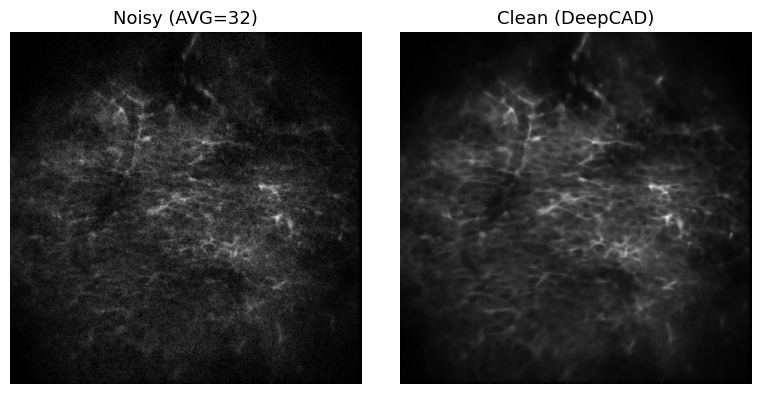

In [16]:
imshow(
    {
        f"Noisy (AVG={AVG})": mot_cor.avg(FRAME, AVG),
        "Clean (DeepCAD)": deepcad[FRAME].np,
    },
    cmap="grey",
)

## 2. Generate samples

In [18]:
noisy_dir = Path("dataset/noisy")
cond_dir = Path("dataset/cond")
noisy_dir.mkdir(exist_ok=True, parents=True)
cond_dir.mkdir(exist_ok=True, parents=True)

In [20]:
# >1m
for i in tqdm(range(0, mot_cor.frames, 8)):
    noisy = mot_cor.avg(i, AVG) * 255
    noisy = np.clip(normalize(noisy, 0.1, 99.9), max=1) * 255
    cond = np.clip(normalize(deepcad[i].np, 0.1, 99.9), max=1) * 255

    Image.fromarray(noisy).convert("L").save(noisy_dir / f"{i}.png")
    Image.fromarray(cond).convert("L").save(cond_dir / f"{i}.png")

100%|██████████| 1250/1250 [00:50<00:00, 24.51it/s]
